# RNN approach for Japanese speaker classification

In [1]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

In [2]:
from preprocessing import readfile, calc_length, flatten
from preprocessing import padding_data, one_hot_encoding
from preprocessing import CHANNELS
from utils import recall, precision, f1
from utils import plot_cm

In [3]:
folder = "data"
train_data = readfile(f"{folder}/ae.train", 0)
test_data = readfile(f"{folder}/ae.test", 1)
maxlength = calc_length(test_data, train_data)

train_input, train_output = padding_data(train_data, maxlength, 0, False, True)
test_input, test_output = padding_data(test_data, maxlength, 1, False, True)

In [4]:
input_shape = train_input[0].shape
output_shape = train_output[0].shape[0]
print(f"Input Shape: {input_shape}")
print(f"Ouput Shape: {output_shape}")

Input Shape: (29, 12)
Ouput Shape: 9


## LSTM
### Single LSTM cell with 4 hidden neurons

In [5]:
model = Sequential()
model.add(LSTM(4, input_shape= input_shape))
model.add(Dense(output_shape, activation = "softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ["categorical_accuracy",
                                                                            recall,
                                                                            precision,
                                                                            f1])
history = model.fit(train_input, train_output, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
270/270 [==============================] - 2s 3ms/step - loss: 2.1935 - categorical_accuracy: 0.1393 - recall: 0.0000e+00 - precision: 0.0000e+00 - f1: 0.0000e+00
Epoch 2/100
270/270 [==============================] - 1s 3ms/step - loss: 2.0671 - categorical_accuracy: 0.1909 - recall: 0.0000e+00 - precision: 0.0000e+00 - f1: 0.0000e+00
Epoch 3/100
270/270 [==============================] - 1s 3ms/step - loss: 1.9114 - categorical_accuracy: 0.1956 - recall: 0.0000e+00 - precision: 0.0000e+00 - f1: 0.0000e+00
Epoch 4/100
270/270 [==============================] - 1s 3ms/step - loss: 1.8507 - categorical_accuracy: 0.2080 - recall: 0.0000e+00 - precision: 0.0000e+00 - f1: 0.0000e+00
Epoch 5/100
270/270 [==============================] - 1s 3ms/step - loss: 1.8261 - categorical_accuracy: 0.2131 - recall: 0.0000e+00 - precision: 0.0000e+00 - f1: 0.0000e+00
Epoch 6/100
270/270 [==============================] - 1s 3ms/step - loss: 1.8177 - categorical_accuracy: 0.1919 - recall: 0.

270/270 [==============================] - 1s 3ms/step - loss: 1.5510 - categorical_accuracy: 0.3515 - recall: 0.0000e+00 - precision: 0.0000e+00 - f1: 0.0000e+00
Epoch 47/100
270/270 [==============================] - 1s 3ms/step - loss: 1.6084 - categorical_accuracy: 0.3153 - recall: 0.0000e+00 - precision: 0.0000e+00 - f1: 0.0000e+00
Epoch 48/100
270/270 [==============================] - 1s 3ms/step - loss: 1.5560 - categorical_accuracy: 0.3350 - recall: 0.0000e+00 - precision: 0.0000e+00 - f1: 0.0000e+00
Epoch 49/100
270/270 [==============================] - 1s 3ms/step - loss: 1.4997 - categorical_accuracy: 0.4243 - recall: 0.0000e+00 - precision: 0.0000e+00 - f1: 0.0000e+00
Epoch 50/100
270/270 [==============================] - 1s 3ms/step - loss: 1.5138 - categorical_accuracy: 0.3970 - recall: 0.0000e+00 - precision: 0.0000e+00 - f1: 0.0000e+00
Epoch 51/100
270/270 [==============================] - 1s 3ms/step - loss: 1.4774 - categorical_accuracy: 0.3929 - recall: 0.0000e+0

270/270 [==============================] - 1s 3ms/step - loss: 0.8259 - categorical_accuracy: 0.7032 - recall: 0.3137 - precision: 0.3137 - f1: 0.3137: 0s - loss: 0.8230 - categorical_accuracy: 0.7042 - recall: 0.3147 - precision: 0.3147 - f1: 0.31
Epoch 96/100
270/270 [==============================] - 1s 3ms/step - loss: 0.8837 - categorical_accuracy: 0.6915 - recall: 0.3435 - precision: 0.3435 - f1: 0.3435
Epoch 97/100
270/270 [==============================] - 1s 3ms/step - loss: 0.9450 - categorical_accuracy: 0.6478 - recall: 0.2861 - precision: 0.2861 - f1: 0.2861
Epoch 98/100
270/270 [==============================] - 1s 3ms/step - loss: 0.8661 - categorical_accuracy: 0.6758 - recall: 0.3188 - precision: 0.3188 - f1: 0.3188
Epoch 99/100
270/270 [==============================] - 1s 3ms/step - loss: 0.8732 - categorical_accuracy: 0.6869 - recall: 0.3902 - precision: 0.3902 - f1: 0.3902
Epoch 100/100
270/270 [==============================] - 1s 3ms/step - loss: 0.8580 - categoric

Accuracy: 73.24 %
Recall: 0.41, Precision: 0.65, F1: 0.48
Loss: 0.8067060112953186


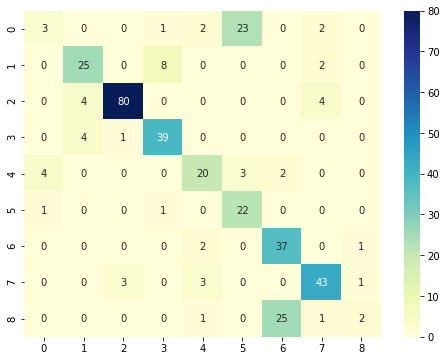

In [6]:
scores = model.evaluate(test_input, test_output, verbose=0)
pred = model.predict(test_input)
print(f"Accuracy: {round(scores[1]*100, 2)} %")
print(f"Recall: {round(scores[2], 2)}, Precision: {round(scores[3], 2)}, F1: {round(scores[4], 2)}")
print(f"Loss: {scores[0]}")
plot_cm(pred, test_output)

### Single LSTM cell with 4 neurons with a dropout of probability 0.2

In [7]:
model = Sequential()
model.add(LSTM(4, input_shape= input_shape))
model.add(Dropout(0.2))
model.add(Dense(output_shape, activation = "softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ["categorical_accuracy",
                                                                            recall,
                                                                            precision,
                                                                            f1])
model.fit(train_input, train_output, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
270/270 [==============================] - 2s 3ms/step - loss: 2.1888 - categorical_accuracy: 0.1299 - recall: 0.0000e+00 - precision: 0.0000e+00 - f1: 0.0000e+00
Epoch 2/100
270/270 [==============================] - 1s 3ms/step - loss: 2.1149 - categorical_accuracy: 0.2413 - recall: 0.0000e+00 - precision: 0.0000e+00 - f1: 0.0000e+00
Epoch 3/100
270/270 [==============================] - 1s 3ms/step - loss: 1.9352 - categorical_accuracy: 0.2851 - recall: 0.0000e+00 - precision: 0.0000e+00 - f1: 0.0000e+00
Epoch 4/100
270/270 [==============================] - 1s 3ms/step - loss: 1.8639 - categorical_accuracy: 0.3100 - recall: 0.0000e+00 - precision: 0.0000e+00 - f1: 0.0000e+00
Epoch 5/100
270/270 [==============================] - 1s 3ms/step - loss: 1.7522 - categorical_accuracy: 0.3410 - recall: 0.0000e+00 - precision: 0.0000e+00 - f1: 0.0000e+00
Epoch 6/100
270/270 [==============================] - 1s 3ms/step - loss: 1.7235 - categorical_accuracy: 0.3871 - recall: 0.

270/270 [==============================] - 1s 3ms/step - loss: 1.2305 - categorical_accuracy: 0.5273 - recall: 0.2122 - precision: 0.2122 - f1: 0.2122
Epoch 50/100
270/270 [==============================] - 1s 3ms/step - loss: 1.0604 - categorical_accuracy: 0.6118 - recall: 0.2636 - precision: 0.2636 - f1: 0.2636
Epoch 51/100
270/270 [==============================] - 1s 3ms/step - loss: 1.1610 - categorical_accuracy: 0.5810 - recall: 0.2814 - precision: 0.2814 - f1: 0.2814
Epoch 52/100
270/270 [==============================] - 1s 3ms/step - loss: 1.0538 - categorical_accuracy: 0.5884 - recall: 0.2785 - precision: 0.2785 - f1: 0.2785
Epoch 53/100
270/270 [==============================] - 1s 3ms/step - loss: 1.0991 - categorical_accuracy: 0.6017 - recall: 0.2816 - precision: 0.2816 - f1: 0.2816
Epoch 54/100
270/270 [==============================] - 1s 3ms/step - loss: 1.0956 - categorical_accuracy: 0.5857 - recall: 0.2523 - precision: 0.2523 - f1: 0.2523
Epoch 55/100
270/270 [=======

270/270 [==============================] - 1s 3ms/step - loss: 0.9024 - categorical_accuracy: 0.6743 - recall: 0.4971 - precision: 0.4971 - f1: 0.4971
Epoch 100/100
270/270 [==============================] - 1s 3ms/step - loss: 0.9458 - categorical_accuracy: 0.6024 - recall: 0.4216 - precision: 0.4216 - f1: 0.4216


Accuracy: 63.78 %
Recall: 0.45, Precision: 0.58, F1: 0.49
Loss: 0.81351238489151


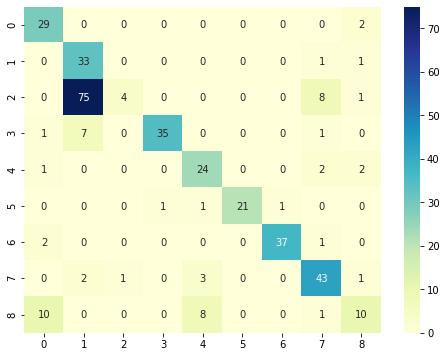

In [8]:
scores = model.evaluate(test_input, test_output, verbose=0)
pred = model.predict(test_input)
print(f"Accuracy: {round(scores[1]*100, 2)} %")
print(f"Recall: {round(scores[2], 2)}, Precision: {round(scores[3], 2)}, F1: {round(scores[4], 2)}")
print(f"Loss: {scores[0]}")
plot_cm(pred, test_output)

### Stacked LSTM: Multiple LSTM cells with 32 neurons each

In [9]:
model = Sequential()
model.add(LSTM(32, input_shape= input_shape, return_sequences= True))
model.add(LSTM(32))
model.add(Dense(output_shape, activation = "softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ["categorical_accuracy",
                                                                            recall,
                                                                            precision,
                                                                            f1])
model.fit(train_input,
          train_output,
          epochs=100,
          batch_size = 1,
          verbose=1)

Epoch 1/100
270/270 [==============================] - 3s 6ms/step - loss: 2.0828 - categorical_accuracy: 0.2412 - recall: 0.0147 - precision: 0.0147 - f1: 0.0147
Epoch 2/100
270/270 [==============================] - 2s 6ms/step - loss: 1.2412 - categorical_accuracy: 0.5790 - recall: 0.3303 - precision: 0.3303 - f1: 0.3303
Epoch 3/100
270/270 [==============================] - 2s 6ms/step - loss: 0.8933 - categorical_accuracy: 0.7551 - recall: 0.5121 - precision: 0.5121 - f1: 0.5121
Epoch 4/100
270/270 [==============================] - 2s 7ms/step - loss: 0.7267 - categorical_accuracy: 0.8027 - recall: 0.6194 - precision: 0.6194 - f1: 0.6194
Epoch 5/100
270/270 [==============================] - 2s 6ms/step - loss: 0.7321 - categorical_accuracy: 0.7374 - recall: 0.6557 - precision: 0.6557 - f1: 0.6557
Epoch 6/100
270/270 [==============================] - 2s 6ms/step - loss: 0.4733 - categorical_accuracy: 0.8816 - recall: 0.8229 - precision: 0.8229 - f1: 0.8229
Epoch 7/100
270/270 [=

270/270 [==============================] - 2s 6ms/step - loss: 0.1964 - categorical_accuracy: 0.9559 - recall: 0.9559 - precision: 0.9559 - f1: 0.9559
Epoch 52/100
270/270 [==============================] - 2s 6ms/step - loss: 0.0775 - categorical_accuracy: 0.9852 - recall: 0.9798 - precision: 0.9798 - f1: 0.9798
Epoch 53/100
270/270 [==============================] - 2s 6ms/step - loss: 0.0931 - categorical_accuracy: 0.9735 - recall: 0.9735 - precision: 0.9735 - f1: 0.9735
Epoch 54/100
270/270 [==============================] - 2s 7ms/step - loss: 0.0584 - categorical_accuracy: 0.9856 - recall: 0.9847 - precision: 0.9847 - f1: 0.9847
Epoch 55/100
270/270 [==============================] - 2s 6ms/step - loss: 0.0402 - categorical_accuracy: 0.9911 - recall: 0.9911 - precision: 0.9911 - f1: 0.9911
Epoch 56/100
270/270 [==============================] - 2s 6ms/step - loss: 0.2066 - categorical_accuracy: 0.9441 - recall: 0.9441 - precision: 0.9441 - f1: 0.9441
Epoch 57/100
270/270 [=======

Accuracy: 91.35 %
Recall: 0.91, Precision: 0.91, F1: 0.91
Loss: 0.3480769395828247


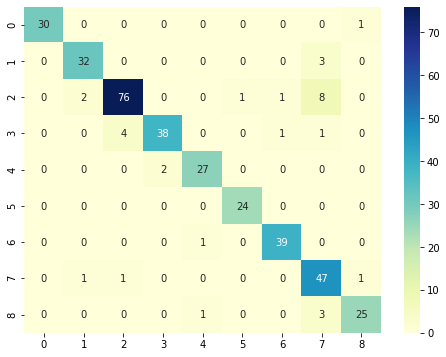

In [10]:
scores = model.evaluate(test_input, test_output, verbose=0)
pred = model.predict(test_input)
print(f"Accuracy: {round(scores[1]*100, 2)} %")
print(f"Recall: {round(scores[2], 2)}, Precision: {round(scores[3], 2)}, F1: {round(scores[4], 2)}")
print(f"Loss: {scores[0]}")
plot_cm(pred, test_output)

In [11]:
model.save("models/best.h5")